### Using a TRILEGAL file for a given healpix, produce maps with Mr - [Fe/H] priors 

Version with a subsample of the hipscat TRILEGAL catalog processed with LSDB

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from dask.distributed import Client
pd.set_option('display.max_columns', None)

In [2]:
import os
import shutil
from collections import defaultdict

def delete_files_and_directories(directory):
    # Dictionary to store the count of each file extension
    extension_counts = defaultdict(int)
    file_count = 0
    dir_count = 0
    
    # Walk through the directory
    for root, dirs, files in os.walk(directory, topdown=False):
        # Delete files and collect their extensions
        for file in files:
            file_path = os.path.join(root, file)
            file_extension = os.path.splitext(file)[1]  # Get file extension
            extension_counts[file_extension] += 1
            os.remove(file_path)
            file_count += 1
        
        # Delete directories
        for dir in dirs:
            dir_path = os.path.join(root, dir)
            shutil.rmtree(dir_path)
            dir_count += 1
    
    # Print the results
    print(f'Total files deleted: {file_count}')
    print(f'Total directories deleted: {dir_count}')
    print('File extensions and their counts:')
    for ext, count in extension_counts.items():
        print(f'{ext}: {count}')
    
    return file_count, dir_count, dict(extension_counts)

In [3]:
# client.close()
client = Client(n_workers=96, threads_per_worker=1, memory_limit="128GB", dashboard_address=':41987')
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:41987/status,
Dashboard: http://127.0.0.1:41987/status,Workers: 96
Total threads: 96,Total memory: 11.18 TiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:41405,Workers: 96
Dashboard: http://127.0.0.1:41987/status,Total threads: 96
Started: Just now,Total memory: 11.18 TiB
Comm: tcp://127.0.0.1:46335,Total threads: 1
Dashboard: http://127.0.0.1:42591/status,Memory: 119.21 GiB
Nanny: tcp://127.0.0.1:39133,


## LSDB

In [4]:
%%time
import lsdb
from lsdb.core.search import BoxSearch

trilegal = lsdb.read_hats("/mnt/beegfs/scratch/data/TRILEGAL/TRILEGAL_hats/TRILEGAL_level_6_cluster")

CPU times: user 2.48 s, sys: 727 ms, total: 3.21 s
Wall time: 2.85 s


VOMBAT:

-12, 12
192, 1, 128GB

CPU times: user 29 s, sys: 12.3 s, total: 41.4 s
Wall time: 1min 58s
??????????????????
___


-30, 30
192, 1, 128GB

CPU times: user 2min 16s, sys: 15.2 s, total: 2min 31s
Wall time: 2min 26s
___

client = Client(n_workers=96, threads_per_worker=1, memory_limit="auto", dashboard_address=':41987')
CPU times: user 2min 19s, sys: 10.9 s, total: 2min 30s
Wall time: 2min 24s
___

client = Client(n_workers=96, threads_per_worker=1, memory_limit="128GB", dashboard_address=':41987')
CPU times: user 2min 20s, sys: 11.2 s, total: 2min 31s
Wall time: 2min 26s

___

client = Client(n_workers=96, threads_per_worker=2, memory_limit="128GB", dashboard_address=':41987')
CPU times: user 2min 20s, sys: 9.2 s, total: 2min 29s
Wall time: 2min 23s
___

client = Client(n_workers=48, threads_per_worker=1, memory_limit="128GB", dashboard_address=':41987')
CPU times: user 2min 20s, sys: 9.26 s, total: 2min 30s
Wall time: 2min 25s
___

client = Client(n_workers=48, threads_per_worker=2, memory_limit="128GB", dashboard_address=':41987')

CPU times: user 2min 17s, sys: 7.85 s, total: 2min 25s
Wall time: 2min 21s

___
___
___

CLUSTER:



___
___
___

Bottom line: CPU occupancy is rather  low, because the whole data set is not balanced. The large pixels take a lot of time to process and therefore multiprocessing does not scale as well. 


In [7]:
%%time

from photod import priors

def prep(df, pix):
    subdir = f'{rootdir}/{str(pix.order)}'
    rootname = f'{subdir}/{str(pix.pixel)}'
    
    if not os.path.exists(subdir):
        os.makedirs(subdir)
        print(f'Directory created: {subdir}')
    else:
        print(f"Directory already exists: {subdir}")


    priors.dumpPriorMaps_testing(df, rootname, pix, verbose=False)
    return pd.DataFrame(data=[(pix, len(df))], columns=['HealPix', 'len'])

rootdir = '/mnt/beegfs/scratch/data/priors/TRILEGAL/level_6'  # TODO: clean this up!

# Perform the deletion and gather statistics
delete_files_and_directories(rootdir)
trilegal.map_partitions(prep, include_pixel=True).compute()

Total files deleted: 5372
Total directories deleted: 2
File extensions and their counts:
.npz: 5179
.txt: 193
Directory created: /mnt/beegfs/scratch/data/priors/TRILEGAL/level_6/0
sample <class 'nested_pandas.nestedframe.core.NestedFrame'>
Healpix:  Order: 0, Pixel: 0 
---------------------------------------
ERROR: no data to make map (see dumpPriorMaps)
ERROR: no data to make map (see dumpPriorMaps)
ERROR: no data to make map (see dumpPriorMaps)
ERROR: no data to make map (see dumpPriorMaps)
ERROR: no data to make map (see dumpPriorMaps)
ERROR: no data to make map (see dumpPriorMaps)
ERROR: no data to make map (see dumpPriorMaps)
ERROR: no data to make map (see dumpPriorMaps)
ERROR: no data to make map (see dumpPriorMaps)
ERROR: no data to make map (see dumpPriorMaps)
ERROR: no data to make map (see dumpPriorMaps)
ERROR: no data to make map (see dumpPriorMaps)
ERROR: no data to make map (see dumpPriorMaps)
ERROR: no data to make map (see dumpPriorMaps)
ERROR: no data to make map (see 

/nvme/lovro/miniconda3/envs/photod-testing/lib/python3.12/site-packages/distributed/client.py:3361: UserWarning: Sending large graph of size 12.14 MiB.
This may cause some slowdown.
Consider loading the data with Dask directly
 or using futures or delayed objects to embed the data into the graph without repetition.
See also https://docs.dask.org/en/stable/best-practices.html#load-data-with-dask for more information.
  warnings.warn(


Directory already exists: /mnt/beegfs/scratch/data/priors/TRILEGAL/level_6/6
sample <class 'nested_pandas.nestedframe.core.NestedFrame'>
Healpix:  Order: 6, Pixel: 24742 
---------------------------------------
Directory already exists: /mnt/beegfs/scratch/data/priors/TRILEGAL/level_6/6
sample <class 'nested_pandas.nestedframe.core.NestedFrame'>
Healpix:  Order: 6, Pixel: 24655 
---------------------------------------
Directory already exists: /mnt/beegfs/scratch/data/priors/TRILEGAL/level_6/6
sample <class 'nested_pandas.nestedframe.core.NestedFrame'>
Healpix:  Order: 6, Pixel: 24546 
---------------------------------------
Directory already exists: /mnt/beegfs/scratch/data/priors/TRILEGAL/level_6/6
sample <class 'nested_pandas.nestedframe.core.NestedFrame'>
Healpix:  Order: 6, Pixel: 1173 
---------------------------------------
Directory already exists: /mnt/beegfs/scratch/data/priors/TRILEGAL/level_6/6
sample <class 'nested_pandas.nestedframe.core.NestedFrame'>
Healpix:  Order: 6, 

2024-12-19 12:33:22,145 - distributed.worker - ERROR - Compute Failed
Key:       ('read_pixel-fused-nestedframe-f85969dbc227640678ef0b83bc48de1d', 727)
State:     executing
Function:  execute_task
args:      ((<function Fused._execute_task at 0x7f3d6d4d5300>, {'read_pixel-fused-nestedframe-f85969dbc227640678ef0b83bc48de1d': ('nestedframe-56074955bdffa0d965d83f1ae19e412b', 727), ('nestedframe-56074955bdffa0d965d83f1ae19e412b', 727): (<function apply at 0x7f3d8d5b13a0>, <function apply_and_enforce at 0x7f3d6d838e00>, [('apply_func-614c71c70a9b22620fdbdd49c7e136ea', 727)], {'_func': <class 'nested_pandas.nestedframe.core.NestedFrame'>, '_meta': Empty NestedFrame
Columns: [HealPix, len]
Index: []}), ('apply_func-614c71c70a9b22620fdbdd49c7e136ea', 727): (<function apply at 0x7f3d8d5b13a0>, <function apply_and_enforce at 0x7f3d6d838e00>, [('nestedframe-b8dd6bf63685a0b0b4e318b4131511d4', 727)], {'partition_info': {'number': 727, 'division': 51369183249694720}, '_func': <function HealpixDatase

TypeError: cannot unpack non-iterable NoneType object

LEVEL 5

In [9]:
%%time

trilegal = lsdb.read_hats("/mnt/beegfs/scratch/data/TRILEGAL/TRILEGAL_hats/TRILEGAL_level_5_cluster")

from photod import priors

def prep(df, pix):
    subdir = f'{rootdir}/{str(pix.order)}'
    rootname = f'{subdir}/{str(pix.pixel)}'
    
    if not os.path.exists(subdir):
        os.makedirs(subdir)
        print(f'Directory created: {subdir}')
    else:
        print(f"Directory already exists: {subdir}")

    priors.dumpPriorMaps_testing(df, rootname, pix, verbose=False)
    return pd.DataFrame(data=[(pix, len(df))], columns=['HealPix', 'len'])

rootdir = '/mnt/beegfs/scratch/data/priors/TRILEGAL/level_5'  # TODO: clean this up!

# Perform the deletion and gather statistics
delete_files_and_directories(rootdir)
trilegal.map_partitions(prep, include_pixel=True).compute()

Total files deleted: 227794
Total directories deleted: 2
File extensions and their counts:
.npz: 219651
.txt: 8143
Directory created: /mnt/beegfs/scratch/data/priors/TRILEGAL/level_5/0
sample <class 'nested_pandas.nestedframe.core.NestedFrame'>
Healpix:  Order: 0, Pixel: 0 
---------------------------------------
ERROR: no data to make map (see dumpPriorMaps)
ERROR: no data to make map (see dumpPriorMaps)
ERROR: no data to make map (see dumpPriorMaps)
ERROR: no data to make map (see dumpPriorMaps)
ERROR: no data to make map (see dumpPriorMaps)
ERROR: no data to make map (see dumpPriorMaps)
ERROR: no data to make map (see dumpPriorMaps)
ERROR: no data to make map (see dumpPriorMaps)
ERROR: no data to make map (see dumpPriorMaps)
ERROR: no data to make map (see dumpPriorMaps)
ERROR: no data to make map (see dumpPriorMaps)
ERROR: no data to make map (see dumpPriorMaps)
ERROR: no data to make map (see dumpPriorMaps)
ERROR: no data to make map (see dumpPriorMaps)
ERROR: no data to make map 

,HealPix,len
0,"Order: 5, Pixel: 0",72298
0,"Order: 5, Pixel: 1",74223
0,"Order: 5, Pixel: 2",72682
0,"Order: 5, Pixel: 3",73456
0,"Order: 5, Pixel: 4",75190
...,...,...
0,"Order: 5, Pixel: 12283",374916
0,"Order: 5, Pixel: 12284",311610
0,"Order: 5, Pixel: 12285",293858
0,"Order: 5, Pixel: 12286",343927


### Level 5 OK; Level 6 FAILED!

In [5]:
219651/27

8135.222222222223

## Continue here

This now needs to be converted into a HATS catalog. `priors_to_hats.ipynb` notebook is used as baseline for conversion.

In [6]:
import numpy as np
from pathlib import Path


prior_np_dir = Path("/mnt/beegfs/scratch/data/priors/TRILEGAL/level_5/5/")
healpix_order = 5

In [7]:
destination_dir = Path("/mnt/beegfs/scratch/data/priors/TRILEGAL/level_5/hats_catalog/")
(destination_dir / "dataset" / "Norder=5" / "Dir=0").mkdir(parents=True, exist_ok=True)
(destination_dir / "dataset" / "Norder=5" / "Dir=10000").mkdir(
    parents=True, exist_ok=True
)

In [8]:
import os
import re
from collections import defaultdict

def process_directory(directory_path):
    # Dictionary to group second numbers by the first number
    grouped_numbers = defaultdict(list)
    
    # Regex pattern to extract the two numbers from filenames
    pattern = re.compile(r"(\d+).*?(\d+)")
    
    # Iterate through all files in the directory
    for filename in os.listdir(directory_path):
        # Match the pattern in the filename
        match = pattern.search(filename)
        if match:
            first_number, second_number = map(int, match.groups())
            grouped_numbers[first_number].append(second_number)
    
    # Sort the dictionary by the first number, and sort each list of second numbers
    sorted_grouped_numbers = {
        first_number: sorted(second_numbers)
        for first_number, second_numbers in sorted(grouped_numbers.items())
    }
    
    return sorted_grouped_numbers

# Example usage
directory_path = prior_np_dir
result = process_directory(directory_path)

# Print the result
# for first_number, second_numbers in result.items():
#    print(f"{first_number}: {second_numbers}")


In [13]:
result

{0: [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26],
 1: [0,
  0,
  1,
  1,
  2,
  2,
  3,
  3,
  4,
  4,
  5,
  5,
  6,
  6,
  7,
  7,
  8,
  8,
  9,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26],
 2: [0,
  0,
  1,
  1,
  2,
  2,
  3,
  3,
  4,
  4,
  5,
  5,
  6,
  6,
  7,
  7,
  8,
  8,
  9,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26],
 3: [0,
  0,
  1,
  1,
  2,
  2,
  3,
  3,
  4,
  4,
  5,
  5,
  6,
  6,
  7,
  7,
  8,
  8,
  9,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26],
 4: [0,
  0,
  1,
  1,
  2,
  2,
  3,
  3,
  4,
  4,
  5,
  5,
  6,
  6,
  7,
  7,
  8,
  8,
  9,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26],
 5: [0,
  0,
  1,
  

In [9]:
print(np.unique([np.min(result[k]) for k in result.keys()]))
print(np.unique([np.max(result[k]) for k in result.keys()]))

[ 0  1  2  3  4  6  8 11 14 15 17 19 24]
[ 0  1  2  4  5  6  7  8  9 24 26]


In [ ]:
import pyarrow as pa
import pyarrow.parquet as pq
from hats.pixel_math import HealpixPixel

from glob import glob

rGrid = np.linspace(14, 27, 27)
for pix in result:
    kdes = []
    xGrids = []
    yGrids = []
    
    for k in result:
        for v in result[k]:
            # file_name = prior_np_dir / f"{pix}-{rind:02d}.npz"
            file_name = prior_np_dir / f"{k}-{v:02d}.npz"
            # print(file_name)
            try:
                prior_contents = np.load(file_name)
                kdes.append(prior_contents["kde"].flatten())
                xGrids.append(prior_contents["xGrid"].flatten())
                yGrids.append(prior_contents["yGrid"].flatten())
            except FileNotFoundError as e:
                print(e, file_name)
    
    healpixel = HealpixPixel(healpix_order, pix)
    print(healpixel)

    table = pa.Table.from_arrays(
        [
            rGrid,
            kdes,
            xGrids,
            yGrids,
            np.full(len(rGrid), fill_value=healpixel.order, dtype=np.int8),
            np.full(len(rGrid), fill_value=healpixel.dir, dtype=np.int64),
            np.full(len(rGrid), fill_value=healpixel.pixel, dtype=np.int64),
            np.full(
                len(rGrid),
                fill_value=healpixel.pixel * (4 ** (29 - healpixel.order)),
                dtype=np.int64,
            ),
        ],
        names=["rmag", "kde", "xGrid", "yGrid", "Norder", "Dir", "Npix", "_healpix_29"],
    )

    hats_file = (
        destination_dir
        / "dataset"
        / f"Norder={healpixel.order}"
        / f"Dir={healpixel.dir}"
        / f"Npix={healpixel.pixel}.parquet"
    )
    pq.write_table(table, hats_file)

[Errno 2] No such file or directory: '/mnt/beegfs/scratch/data/priors/TRILEGAL/level_5/5/327-04.npz' /mnt/beegfs/scratch/data/priors/TRILEGAL/level_5/5/327-04.npz
[Errno 2] No such file or directory: '/mnt/beegfs/scratch/data/priors/TRILEGAL/level_5/5/327-05.npz' /mnt/beegfs/scratch/data/priors/TRILEGAL/level_5/5/327-05.npz
[Errno 2] No such file or directory: '/mnt/beegfs/scratch/data/priors/TRILEGAL/level_5/5/331-00.npz' /mnt/beegfs/scratch/data/priors/TRILEGAL/level_5/5/331-00.npz
[Errno 2] No such file or directory: '/mnt/beegfs/scratch/data/priors/TRILEGAL/level_5/5/331-01.npz' /mnt/beegfs/scratch/data/priors/TRILEGAL/level_5/5/331-01.npz
[Errno 2] No such file or directory: '/mnt/beegfs/scratch/data/priors/TRILEGAL/level_5/5/331-02.npz' /mnt/beegfs/scratch/data/priors/TRILEGAL/level_5/5/331-02.npz
[Errno 2] No such file or directory: '/mnt/beegfs/scratch/data/priors/TRILEGAL/level_5/5/331-03.npz' /mnt/beegfs/scratch/data/priors/TRILEGAL/level_5/5/331-03.npz
[Errno 2] No such file

In [11]:
import hats.io.file_io as io
from hats.catalog import PartitionInfo
from hats.io import paths
from hats.io.parquet_metadata import write_parquet_metadata

from hats.catalog import TableProperties
from pathlib import Path

from datetime import datetime, timezone
import numpy as np

parquet_rows = write_parquet_metadata(destination_dir)

# Read partition info from _metadata and write to partition_info.csv
partition_info = PartitionInfo.read_from_dir(destination_dir)
partition_info_file = paths.get_partition_info_pointer(destination_dir)
partition_info.write_to_file(partition_info_file)

now = datetime.now(tz=timezone.utc)

catalog_info = TableProperties(
    catalog_name="TRILEGAL_level_5_priors",
    total_rows=parquet_rows,
    hats_order=5,
    hats_builder="Lovro Palaversa",
    hats_creation_date=now.strftime("%Y-%m-%dT%H:%M%Z"),
    catalog_type="map",
    ra_column=None,
    dec_column=None,
)
catalog_info.to_properties_file(destination_dir)

(<Figure size 1000x500 with 2 Axes>,
 <WCSAxes: title={'center': 'Catalog pixel density map - TRILEGAL_level_5_priors'}>)

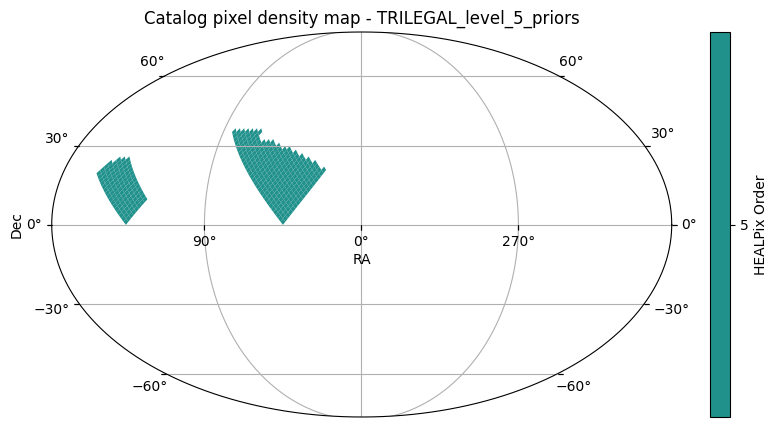

In [12]:
from hats import read_hats

catalog = read_hats(destination_dir)
catalog.plot_pixels()